## Logistic regression challenger model (Mario Mendez, Curiosity team)

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [4]:
#Loading the data sets
filename_train = '../Data/data_train.csv' #Train data set
filename_test = '../Data/data_test.csv'  #test data set

df_train = pd.read_csv(filename_train)
df_test = pd.read_csv(filename_test)

#Exploring the data set
df_train.describe(include='all')

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,255836.000000,255836,255836.000000,255836,255836,255836,255836.000000,255836.000000,255836,255836,255836,255836,255836,255836,255836,255836.000000,255836,255836,255836
unique,NaN,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,NaN,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,NaN,233982,NaN,150331,238399,246203,NaN,NaN,220239,134553,27289,196308,215742,198417,90902,NaN,221604,246455,231991
mean,159781.150983,NaN,28.322066,NaN,NaN,NaN,3.371531,3.905197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.098004,NaN,NaN,NaN
std,92258.112514,NaN,6.346842,NaN,NaN,NaN,7.953704,7.958074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435068,NaN,NaN,NaN
min,0.000000,NaN,12.020000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,79881.750000,NaN,24.030000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,159686.500000,NaN,27.340000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,239508.250000,NaN,31.450000,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [5]:
# Exploring the number of values for feature on the data set.

for column in df_train:
    unique_values = np.unique(df_train[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Unnamed: 0 is: 255836
The number of values for feature HeartDisease is: 2 -- ['No' 'Yes']
The number of values for feature BMI is: 3445
The number of values for feature Smoking is: 2 -- ['No' 'Yes']
The number of values for feature AlcoholDrinking is: 2 -- ['No' 'Yes']
The number of values for feature Stroke is: 2 -- ['No' 'Yes']
The number of values for feature PhysicalHealth is: 31
The number of values for feature MentalHealth is: 31
The number of values for feature DiffWalking is: 2 -- ['No' 'Yes']
The number of values for feature Sex is: 2 -- ['Female' 'Male']
The number of values for feature AgeCategory is: 13
The number of values for feature Race is: 6 -- ['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
The number of values for feature Diabetic is: 4 -- ['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
The number of values for feature PhysicalActivity is: 2 -- ['No' 'Yes']
The number of values for featur

In [6]:
#Transforming the heart disease categorical variable into a binary variable

df_train_cat = df_train.select_dtypes(include="object")

df_train["HeartDisease"] = df_train["HeartDisease"].replace({"No": 0, "Yes": 1})

print('Train data value counts for "HeartDisease" columns:''\n', df_train["HeartDisease"].value_counts())
print('\n')


df_test_cat = df_test.select_dtypes(include="object")
df_test["HeartDisease"] = df_test["HeartDisease"].replace({"No": 0, "Yes": 1})
df_test["HeartDisease"].unique()

print('Test data value counts for "HeartDisease" columns:''\n', df_test["HeartDisease"].value_counts())
print('\n')

# Replacing 'Yes (during pregnancy)' and  'No, borderline diabetes' with 'yes' and 'no' on the diabetes column

df_train.replace('Yes (during pregnancy)', 'Yes', inplace=True)
df_train.replace('No, borderline diabetes', 'No', inplace=True)
print('Train data value counts for Diabetic columns:''\n', df_train['Diabetic'].value_counts())
print('\n')

df_test.replace('Yes (during pregnancy)', 'Yes', inplace=True)
df_test.replace('No, borderline diabetes', 'No', inplace=True)
print('Test data value counts for Diabetic columns:''\n', df_test['Diabetic'].value_counts())


Train data value counts for "HeartDisease" columns:
 0    233982
1     21854
Name: HeartDisease, dtype: int64


Test data value counts for "HeartDisease" columns:
 0    58440
1     5519
Name: HeartDisease, dtype: int64


Train data value counts for Diabetic columns:
 No     221177
Yes     34659
Name: Diabetic, dtype: int64


Test data value counts for Diabetic columns:
 No     55257
Yes     8702
Name: Diabetic, dtype: int64


In [7]:
#Implementing Dummy variables
df_train_D = pd.get_dummies(df_train)
df_test_D = pd.get_dummies(df_test)

for column in df_train_D :
    unique_values = np.unique(df_train_D[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))
        
df_train_D.head()

The number of values for feature Unnamed: 0 is: 255836
The number of values for feature HeartDisease is: 2 -- [0 1]
The number of values for feature BMI is: 3445
The number of values for feature PhysicalHealth is: 31
The number of values for feature MentalHealth is: 31
The number of values for feature SleepTime is: 24
The number of values for feature Smoking_No is: 2 -- [0 1]
The number of values for feature Smoking_Yes is: 2 -- [0 1]
The number of values for feature AlcoholDrinking_No is: 2 -- [0 1]
The number of values for feature AlcoholDrinking_Yes is: 2 -- [0 1]
The number of values for feature Stroke_No is: 2 -- [0 1]
The number of values for feature Stroke_Yes is: 2 -- [0 1]
The number of values for feature DiffWalking_No is: 2 -- [0 1]
The number of values for feature DiffWalking_Yes is: 2 -- [0 1]
The number of values for feature Sex_Female is: 2 -- [0 1]
The number of values for feature Sex_Male is: 2 -- [0 1]
The number of values for feature AgeCategory_18-24 is: 2 -- [0 1]


,Unnamed: 0,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,158560,0,22.31,0.0,10.0,8.0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
1,101198,0,25.62,0.0,1.0,6.0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
2,61086,0,23.40,0.0,2.0,8.0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,81468,0,19.85,0.0,0.0,8.0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
4,284782,0,41.57,15.0,5.0,6.0,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0


In [8]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

names = df_train_D.columns
d_train = scaler.fit_transform(df_train_D)

d_test = scaler.fit_transform(df_test_D)

df_train_SD= pd.DataFrame(d_train, columns=names)
df_test_SD= pd.DataFrame(d_test, columns=names)
df_test_SD.head()

,Unnamed: 0,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0.930685,0.0,0.134308,0.0,0.0,0.217391,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.945645,0.0,0.163554,0.0,0.0,0.260870,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.926079,0.0,0.225854,0.0,0.0,0.304348,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.772415,0.0,0.296510,1.0,0.0,0.086957,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.080641,0.0,0.125707,0.1,0.0,0.304348,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [9]:
y_train = df_train_SD["HeartDisease"]
x_train = df_train_SD.drop("HeartDisease", axis=1)

y_test =df_test_SD["HeartDisease"]
x_test =df_test_SD.drop("HeartDisease", axis=1)

In [10]:
#trainning the logistic regression model

log_model_bal = LogisticRegression(max_iter=500,class_weight="balanced")
log_model_bal.fit(x_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=500)

In [11]:
#declaring a function that will evaluate the predictive model

def Eval_Model(model, X_test, y_test):
    y_predict = model.predict(X_test)
    y_predict_prob = model.predict_proba(X_test)[::, 1]
    print(classification_report(y_predict, y_test))
    
    FPR, TPR, _ = roc_curve(y_test,  y_predict_prob)
    auc = roc_auc_score(y_test,  y_predict_prob)
    plt.plot(FPR, TPR, label=f'AUC: {round(auc, 2)}')
    plt.legend()
    plt.show()

              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85     44912
         1.0       0.78      0.23      0.35     19047

    accuracy                           0.75     63959
   macro avg       0.77      0.60      0.60     63959
weighted avg       0.76      0.75      0.70     63959



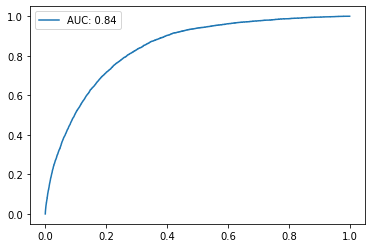

In [12]:
Eval_Model(log_model_bal, x_test, y_test)

In [13]:
y_pred=log_model_bal.predict(x_test)
cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[43712 14728]
 [ 1200  4319]]


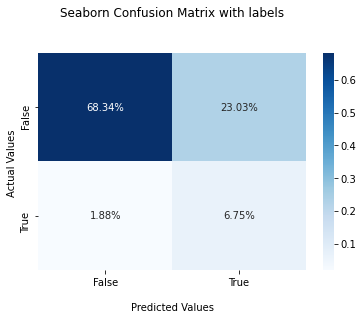

In [14]:
import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

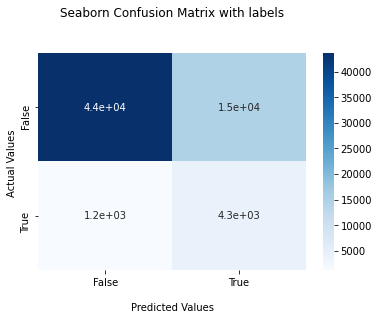

In [15]:
ax = sns.heatmap(cf_matrix, annot=True,cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()